In [1]:
from miccai_dice import get_LesionWiseResults, get_GTseg_combinedByDilation
from proposed_dice import proposed_metric

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

import cc3d
import scipy

import warnings
warnings.filterwarnings("ignore")

In [2]:
gt   = np.zeros((55, 55))
pred = np.zeros((55, 55))

pred[5:19, 5:19] = 1
gt[5:19, 5:19] = 1
pred[22:23, 22:23] = 1
gt[22:23, 21:23] = 1

gt_cc = cc3d.connected_components(gt)

dilation_struct = scipy.ndimage.generate_binary_structure(2, 3)
gt_dil = scipy.ndimage.binary_dilation(gt, structure=dilation_struct, iterations=1)
gt_dil_cc = cc3d.connected_components(gt_dil)

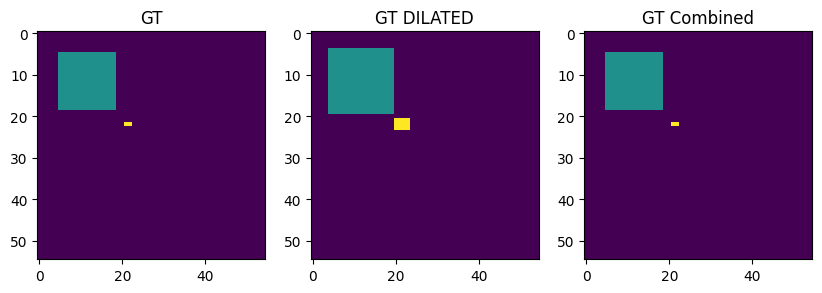

In [3]:
final_gt = get_GTseg_combinedByDilation(gt_dil_cc, gt_cc)
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
cax = []

# Plot GT with colorbar
im0 = ax[0].imshow(gt_cc, cmap='viridis')
ax[0].set_title('GT')
im1 = ax[1].imshow(gt_dil_cc, cmap='viridis')
ax[1].set_title('GT DILATED')
im2 = ax[2].imshow(final_gt, cmap='viridis')
ax[2].set_title('GT Combined')
plt.show()

Uniques values in GT after CC:  [0 1 2]
Choosing the component and making it to 1:  [0 1]

Uniques values in Pred after CC:  [0 1 2]


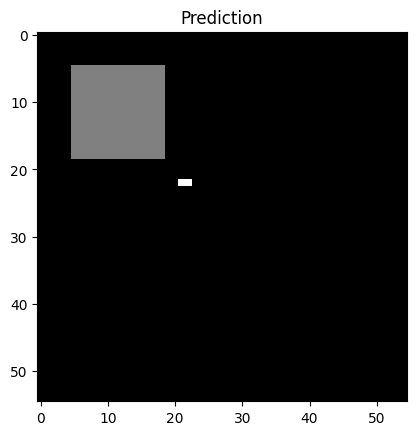

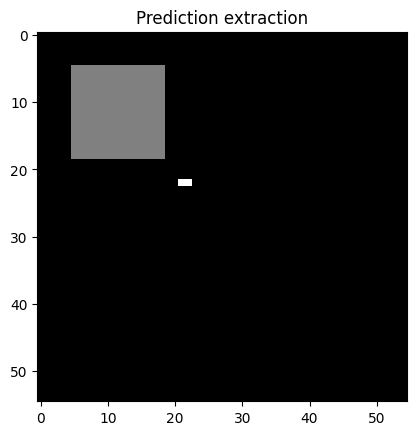

Extracting the TP Lesions  [0 1 2]
Unique values in intersecting CC:  [0 1]
Removing the 0 from Unique values in intersecting CC:  [1]
True positives currenlty accumulated:  [1]




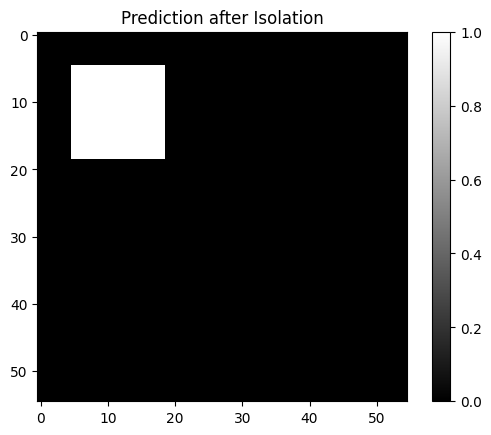

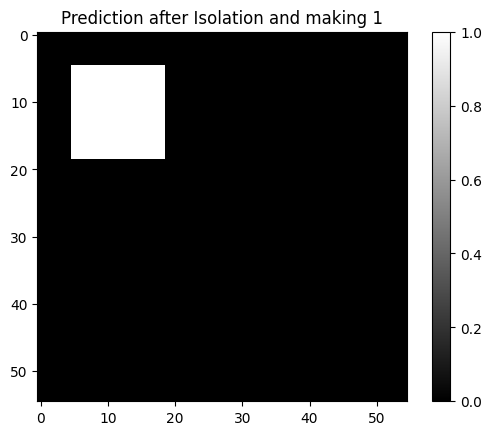

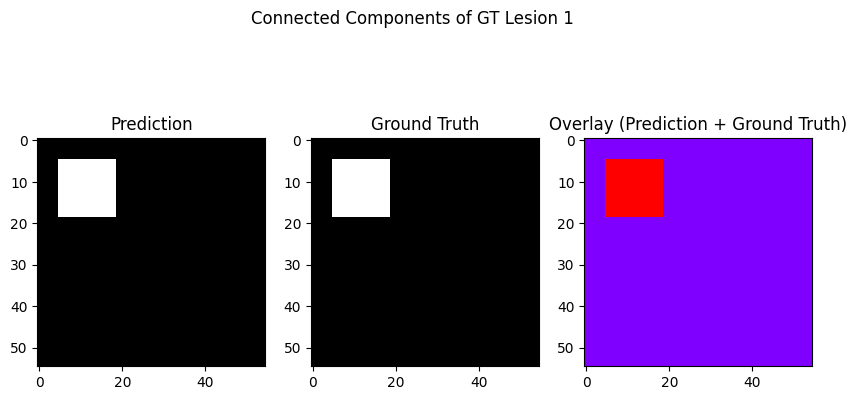

Dice score for GT Lesion 1 is 1.0
--------------------------------------------
Uniques values in GT after CC:  [0 1 2]
Choosing the component and making it to 1:  [0 1]

Uniques values in Pred after CC:  [0 1 2]


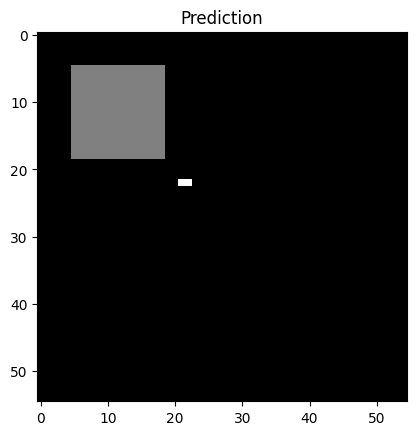

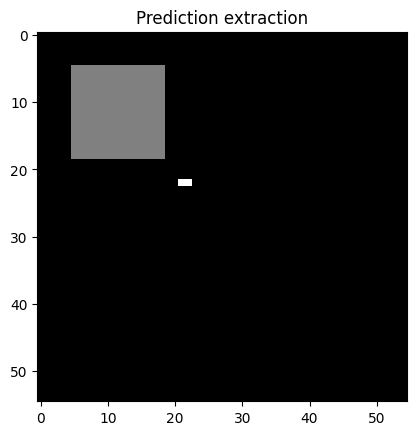

Extracting the TP Lesions  [0 1 2]
Unique values in intersecting CC:  [0 2]
Removing the 0 from Unique values in intersecting CC:  [2]
True positives currenlty accumulated:  [1, 2]




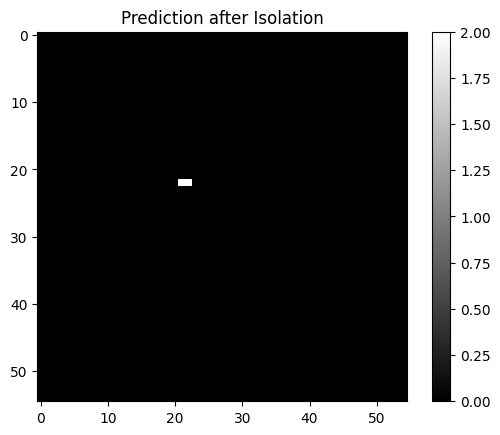

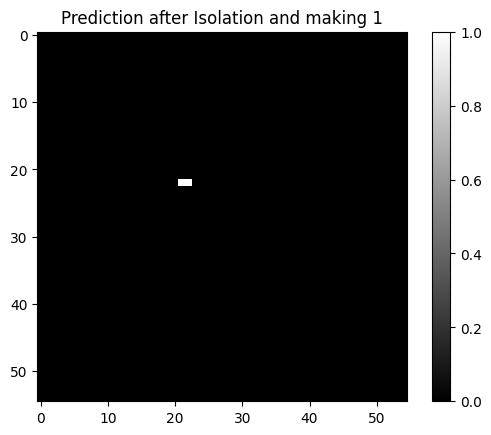

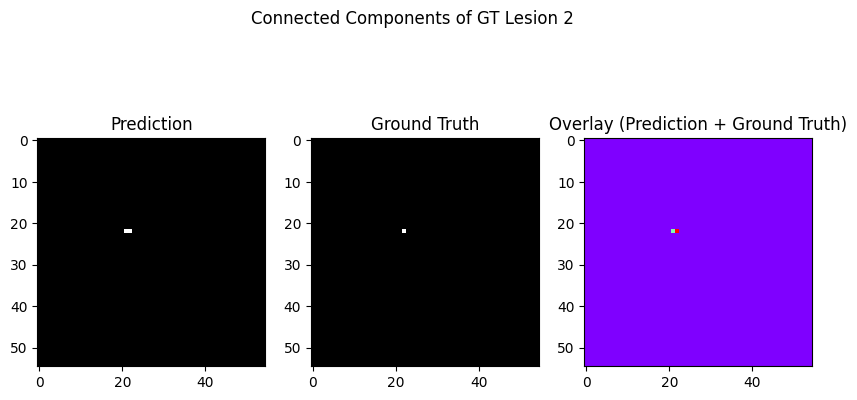

Dice score for GT Lesion 2 is 0.6666666666666666
--------------------------------------------


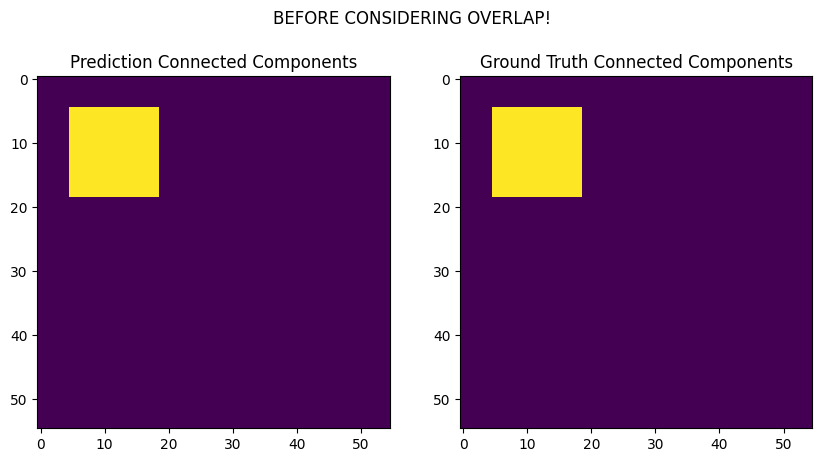

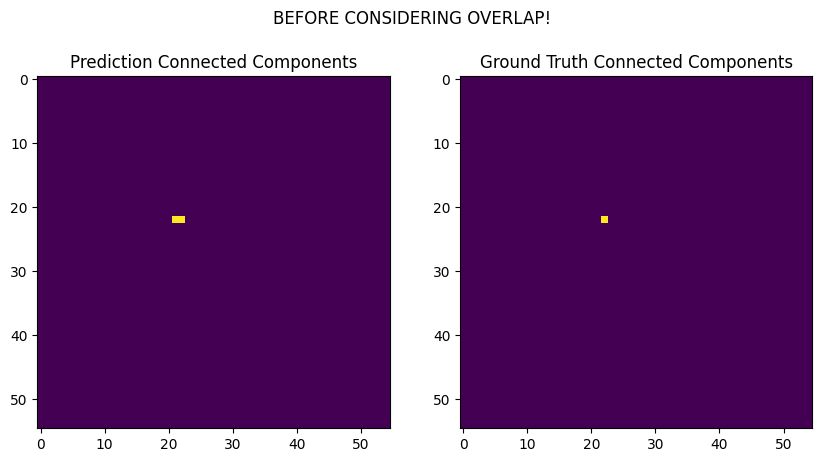

Values based on no overlap:
{'GT': 1, 'Pred': 1, 'Dice': 1.0}
{'GT': 2, 'Pred': 2, 'Dice': 0.6666666666666666}
Values based on overlap:

Tally of all values:
   GT  Pred      Dice
0   1     1  1.000000
1   2     2  0.666667

Taking the set of the single and overlapped GTs based on Predicition component values:
   GT  Pred      Dice
0   1     1  1.000000
1   2     2  0.666667

Proposed Metric: 0.8333333333333333


In [4]:
get_LesionWiseResults(gt, pred, 'BraTS-MET')
print('Proposed Metric:', proposed_metric(gt, pred))

In [5]:
gt   = np.zeros((55, 55))
pred = np.zeros((55, 55))

pred[5:19, 5:19] = 1
gt[5:19, 5:19] = 1
pred[20:21, 20:21] = 1
gt[20:21, 20:22] = 1

gt_cc = cc3d.connected_components(gt)

dilation_struct = scipy.ndimage.generate_binary_structure(2, 3)
gt_dil = scipy.ndimage.binary_dilation(gt, structure=dilation_struct, iterations=1)
gt_dil_cc = cc3d.connected_components(gt_dil)

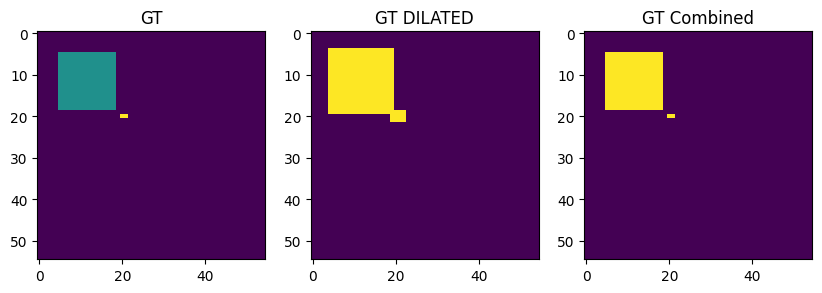

In [6]:
final_gt = get_GTseg_combinedByDilation(gt_dil_cc, gt_cc)
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
cax = []

# Plot GT with colorbar
im0 = ax[0].imshow(gt_cc, cmap='viridis')
ax[0].set_title('GT')
im1 = ax[1].imshow(gt_dil_cc, cmap='viridis')
ax[1].set_title('GT DILATED')
im2 = ax[2].imshow(final_gt, cmap='viridis')
ax[2].set_title('GT Combined')
plt.show()

Uniques values in GT after CC:  [0 1]
Choosing the component and making it to 1:  [0 1]

Uniques values in Pred after CC:  [0 1 2]


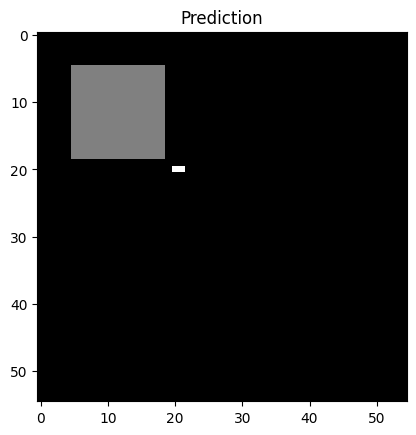

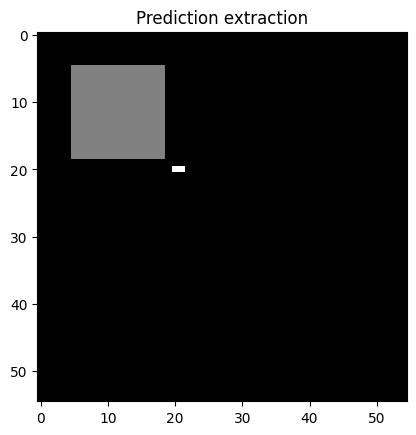

Extracting the TP Lesions  [0 1 2]
Unique values in intersecting CC:  [0 1 2]
Removing the 0 from Unique values in intersecting CC:  [1 2]
True positives currenlty accumulated:  [1]
True positives currenlty accumulated:  [1, 2]




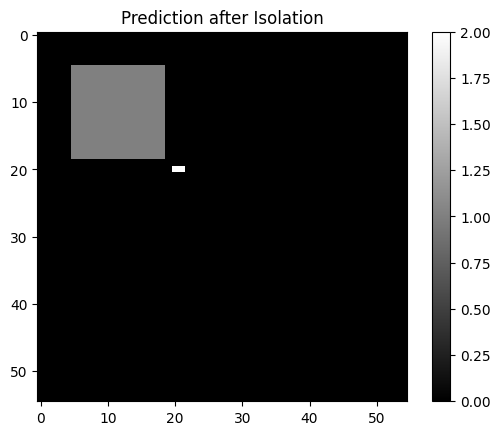

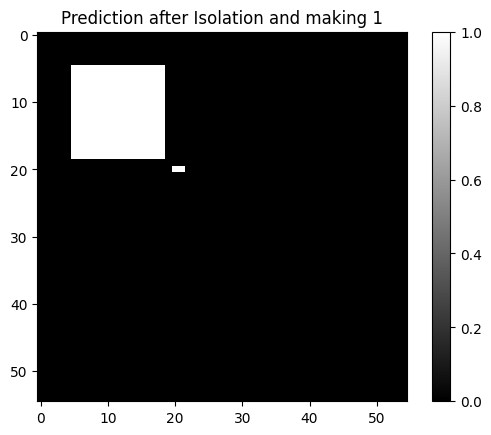

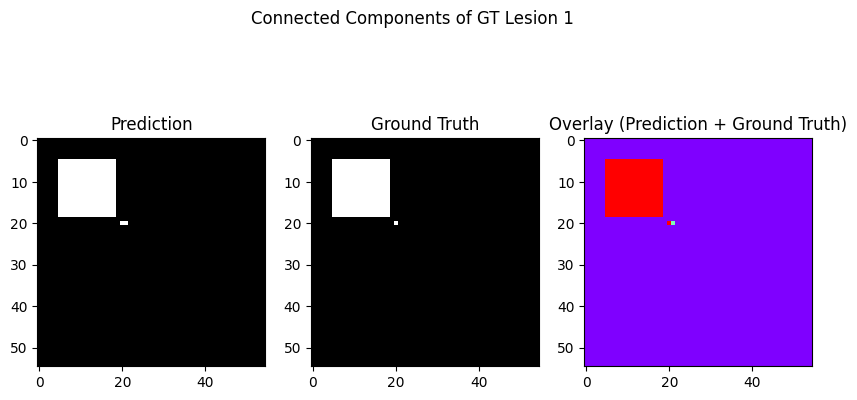

Dice score for GT Lesion 1 is 0.9974683544303797
--------------------------------------------


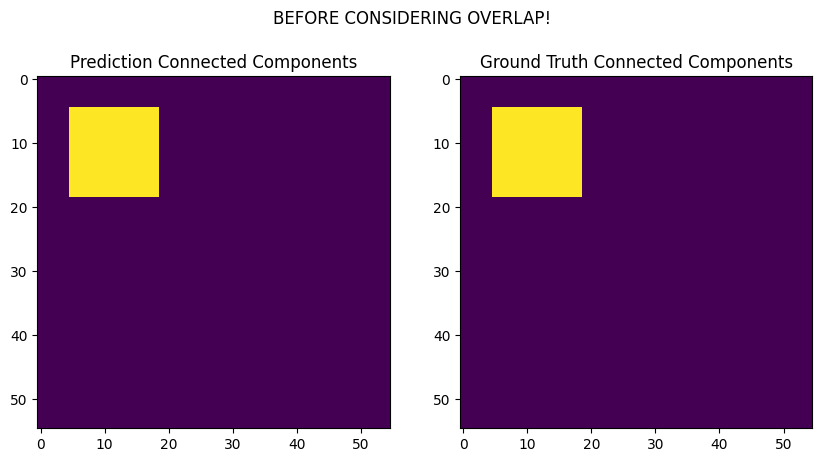

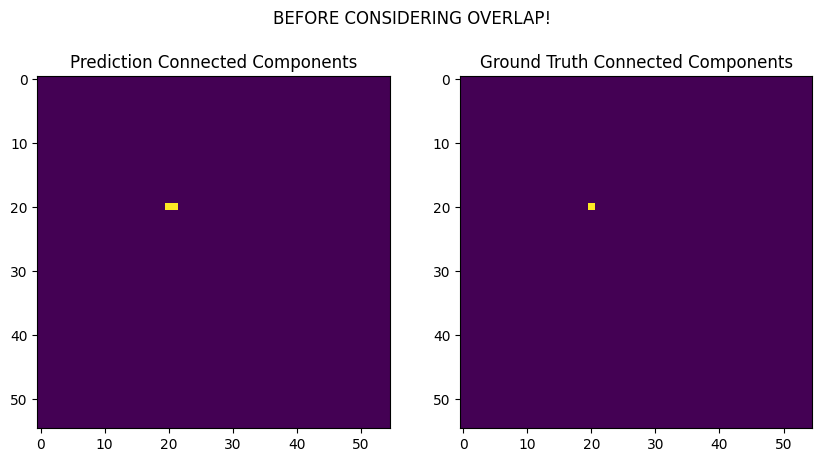

Values based on no overlap:
{'GT': 1, 'Pred': 1, 'Dice': 1.0}
{'GT': 2, 'Pred': 2, 'Dice': 0.6666666666666666}
Values based on overlap:

Tally of all values:
   GT  Pred      Dice
0   1     1  1.000000
1   2     2  0.666667

Taking the set of the single and overlapped GTs based on Predicition component values:
   GT  Pred      Dice
0   1     1  1.000000
1   2     2  0.666667

Proposed Metric: 0.8333333333333333


In [7]:
get_LesionWiseResults(gt, pred, 'BraTS-MET')
print('Proposed Metric:', proposed_metric(gt, pred))